In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
import itertools 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
engine1h = pd.read_csv(r'Engine3_1h.csv')
engine1h.head()

,Unnamed: 0,Date_time,THRM_EFF_BTU
0,0,01/01/2021 00:00,22.910171
1,1,01/01/2021 01:00,22.856912
2,2,01/01/2021 02:00,22.918531
3,3,01/01/2021 03:00,22.942700
4,4,01/01/2021 04:00,22.863096


In [5]:
engine1h.index = pd.to_datetime(engine1h['Date_time'])
engine1h.drop(columns='Date_time',inplace=True)
engine1h.drop(['Unnamed: 0'], axis=1, inplace=True)
engine1h.head()

,THRM_EFF_BTU
Date_time,
2021-01-01 00:00:00,22.910171
2021-01-01 01:00:00,22.856912
2021-01-01 02:00:00,22.918531
2021-01-01 03:00:00,22.942700
2021-01-01 04:00:00,22.863096


In [6]:
engine1h.describe()

,THRM_EFF_BTU
count,8761.000000
mean,27.110160
std,14.499906
min,0.000000
25%,21.868411
50%,33.087613
75%,37.552449
max,39.761882


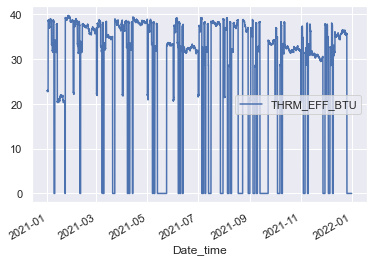

In [7]:
engine1h.plot();

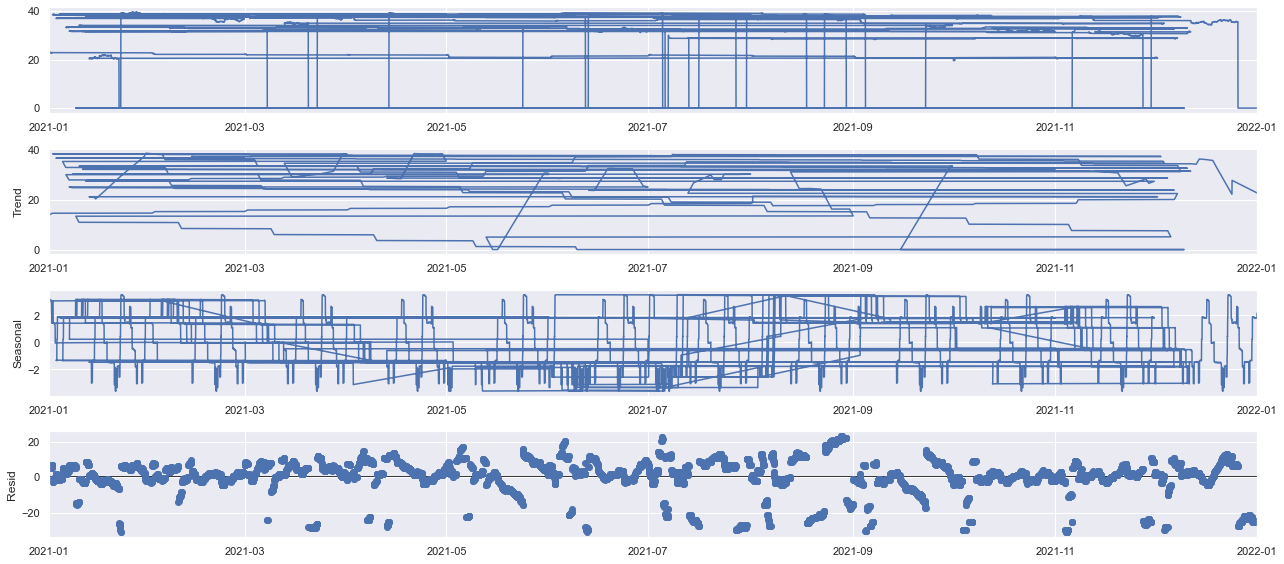

In [15]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
descomponer = sm.tsa.seasonal_decompose(engine1h, period=365, extrapolate_trend='freq')
#resplot = des.plot()
fig = descomponer.plot()
plt.show()

In [16]:
engine_dia = engine1h.resample('d').mean()
engine_dia

,THRM_EFF_BTU
Date_time,
2021-01-01,22.891202
2021-01-02,38.516979
2021-01-03,37.091051
2021-01-04,38.815453
2021-01-05,38.547450
...,...
2021-12-28,0.000000
2021-12-29,0.000000
2021-12-30,0.000000


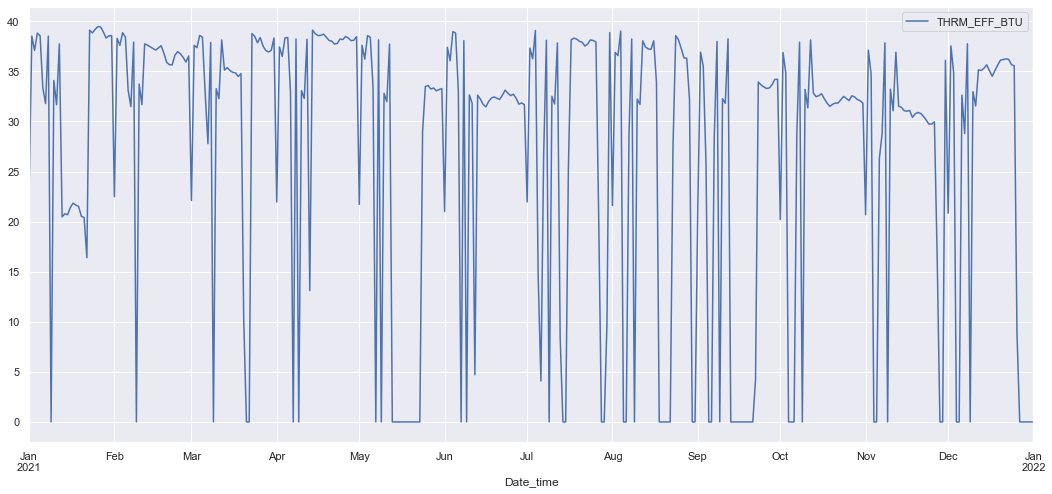

In [17]:
engine_dia.plot();

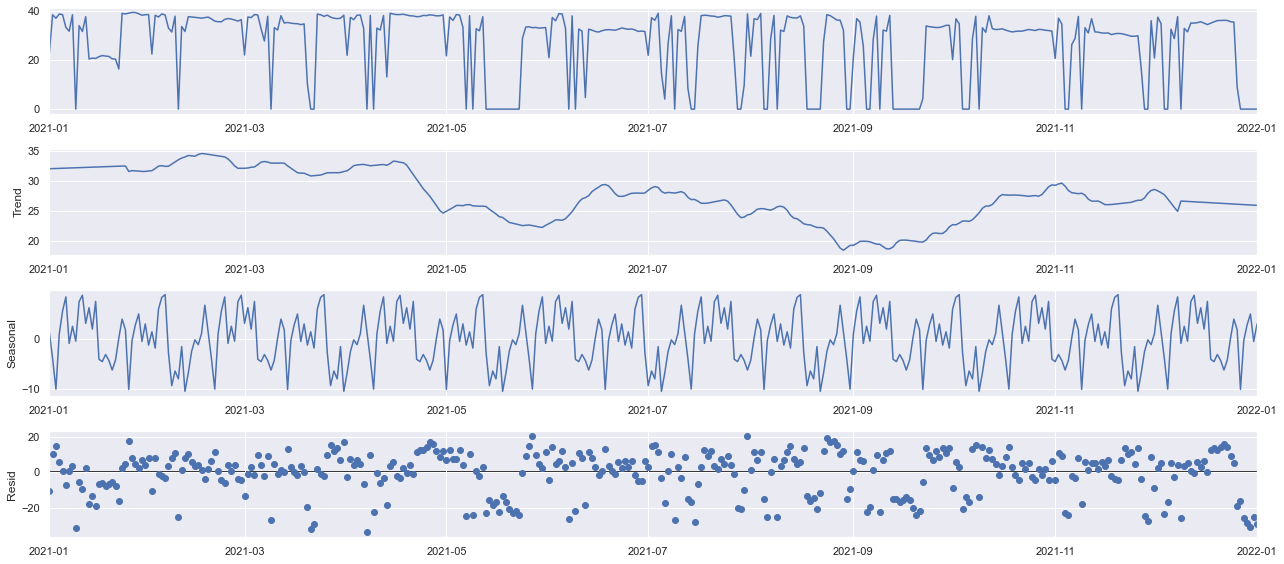

In [19]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
descomponer = sm.tsa.seasonal_decompose(engine_dia, period=48, extrapolate_trend='freq')
#resplot = des.plot()
fig = descomponer.plot()
plt.show()

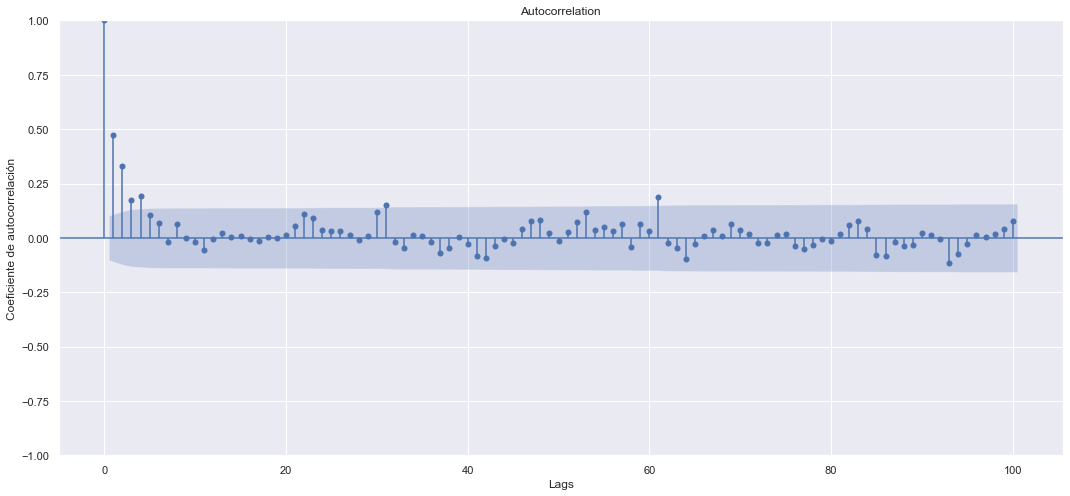

In [21]:
# Your code here:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(engine_dia.values.squeeze(), lags=100)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show()

In [22]:
def viewing_stationarity(df, window=5):
  #Esta función genera un plot para una serie de tiempo con su media móvil y su desviación estándar.


    rolmean = df.rolling(window=window).mean()
    rolstd = df.rolling(window=window).std()

    fig = plt.figure(figsize=(10, 5))
    time_series = plt.plot(df, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='media móvil')
    std = plt.plot(rolstd, color='green', label='desviación estándar móvil')
    plt.legend(loc='best')
    plt.show();

In [23]:
class Stationary:
    def __init__(self, significance=0.05):
        self.significance_level = significance
        self.pvalue = None
        self.is_stationary = None

    def ADF(self, values):
        result = adfuller(values, autolag='AIC')

        format_results = pd.Series(result[:4], 
                                    index=['Statistic', 'P-value',
                                          'Num of Lags', 'Observations'])
        for k,v in result[4].items():
              format_results[f'Critical Value {k}'] = v

        return format_results

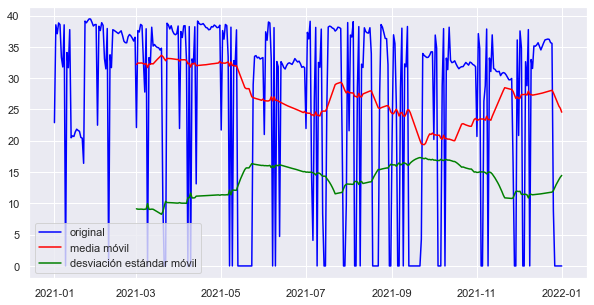

Statistic              -6.22932
P-value                 0.00000
Num of Lags             3.00000
Observations          362.00000
Critical Value 1%      -3.44854
Critical Value 5%      -2.86956
Critical Value 10%     -2.57104
dtype: float64

In [24]:
viewing_stationarity(engine_dia, window=60)
adf_test = Stationary()
adf_test.ADF(engine_dia.values).round(5)

In [27]:
engine_dia_copia = engine_dia
engine_dia_copia['THRM_EFF_BTU_shift'] = engine_dia_copia['THRM_EFF_BTU'].shift(1) # bits = n, bits_shift1 = n-1
engine_dia_copia.head()

,THRM_EFF_BTU,THRM_EFF_BTU_shift
Date_time,,
2021-01-01,22.891202,NaN
2021-01-02,38.516979,22.891202
2021-01-03,37.091051,38.516979
2021-01-04,38.815453,37.091051
2021-01-05,38.547450,38.815453


In [29]:
engine_dia_copia['THRM_EFF_BTU_diff'] = engine_dia_copia['THRM_EFF_BTU'] - engine_dia_copia['THRM_EFF_BTU_shift']
engine_dia_copia.head()

,THRM_EFF_BTU,THRM_EFF_BTU_shift,THRM_EFF_BTU_diff
Date_time,,,
2021-01-01,22.891202,NaN,NaN
2021-01-02,38.516979,22.891202,15.625778
2021-01-03,37.091051,38.516979,-1.425928
2021-01-04,38.815453,37.091051,1.724402
2021-01-05,38.547450,38.815453,-0.268003


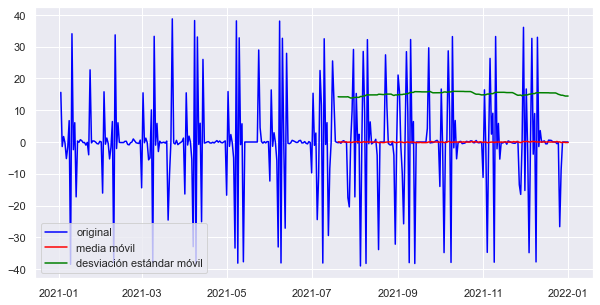

Statistic             -11.027814
P-value                 0.000000
Num of Lags             6.000000
Observations          358.000000
Critical Value 1%      -3.448749
Critical Value 5%      -2.869647
Critical Value 10%     -2.571089
dtype: float64

In [30]:
viewing_stationarity(engine_dia_copia['THRM_EFF_BTU_diff'].dropna(), window=200)
adf_test = Stationary()
adf_test.ADF(engine_dia_copia['THRM_EFF_BTU_diff'].dropna().values).round(6)

In [31]:
model=sm.tsa.arima.ARIMA(engine_dia_copia['THRM_EFF_BTU'],order=(1,1,1))
history=model.fit()
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           THRM_EFF_BTU   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1438.821
Date:                Sat, 12 Mar 2022   AIC                           2883.642
Time:                        16:31:18   BIC                           2895.342
Sample:                    01-01-2021   HQIC                          2888.292
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.047      9.645      0.000       0.362       0.547
ma.L1         -0.9841      0.012    -80.768      0.000      -1.008      -0.960
sigma2       154.3521     10.765     14.339      0.000     133.253     175.451
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                71.68
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                            -1.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
engine_dia_copia.head()

,THRM_EFF_BTU,THRM_EFF_BTU_shift,THRM_EFF_BTU_diff
Date_time,,,
2021-01-01,22.891202,NaN,NaN
2021-01-02,38.516979,22.891202,15.625778
2021-01-03,37.091051,38.516979,-1.425928
2021-01-04,38.815453,37.091051,1.724402
2021-01-05,38.547450,38.815453,-0.268003


In [33]:
engine_dia_copia.tail()

,THRM_EFF_BTU,THRM_EFF_BTU_shift,THRM_EFF_BTU_diff
Date_time,,,
2021-12-28,0.0,0.0,0.0
2021-12-29,0.0,0.0,0.0
2021-12-30,0.0,0.0,0.0
2021-12-31,0.0,0.0,0.0
2022-01-01,0.0,0.0,0.0


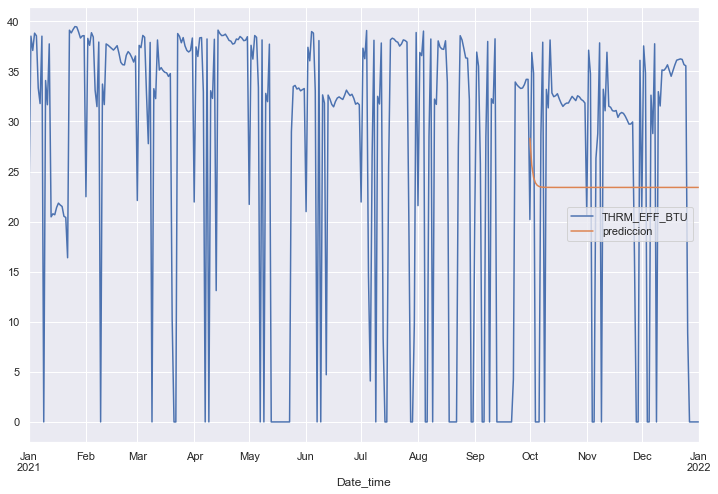

In [35]:
engine_dia_copia['prediccion']=history.predict(start="2021-10-01",end="2022-01-01",dynamic=True)
engine_dia_copia[['THRM_EFF_BTU','prediccion']].plot(figsize=(12,8));

In [36]:
model=sm.tsa.arima.ARIMA(engine_dia_copia['THRM_EFF_BTU_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      THRM_EFF_BTU_diff   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1465.599
Date:                Sat, 12 Mar 2022   AIC                           2937.199
Time:                        16:34:56   BIC                           2948.890
Sample:                    01-02-2021   HQIC                          2941.845
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3673      0.041     -8.907      0.000      -0.448      -0.286
ma.L1         -0.9991      0.373     -2.678      0.007      -1.730      -0.268
sigma2       180.8033     68.488      2.640      0.008      46.568     315.038
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                50.76
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.52
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

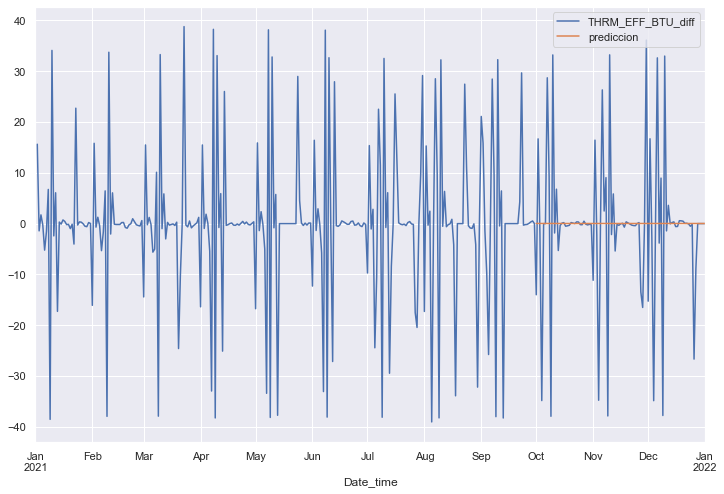

In [37]:
engine_dia_copia['prediccion']=model_fit.predict(start="2021-10-01",end="2022-01-01",dynamic=True)
engine_dia_copia[['THRM_EFF_BTU_diff','prediccion']].plot(figsize=(12,8));

In [38]:
model=sm.tsa.statespace.SARIMAX(engine_dia_copia['THRM_EFF_BTU'],order=(1, 1, 1),seasonal_order=(1,1,1,15))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       THRM_EFF_BTU   No. Observations:                  366
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 15)   Log Likelihood               -1401.861
Date:                            Sat, 12 Mar 2022   AIC                           2813.723
Time:                                    16:37:12   BIC                           2833.012
Sample:                                01-01-2021   HQIC                          2821.401
                                     - 01-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4433      0.048      9.296      0.000       0.350       0.537
ma.L1         -0.9891      0.021    -46.344      0.000      -1.031      -0.947
ar.S.L15      -0.0188      0.068     -0.276      0.782      -0.152       0.114
ma.S.L15      -0.9954      0.698     -1.425      0.154      -2.364       0.374
sigma2       151.6484    105.305      1.440      0.150     -54.745     358.042
===================================================================================
Ljung-Box (L1) (Q):                   1.99   Jarque-Bera (JB):                54.36
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.90
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date_time'>

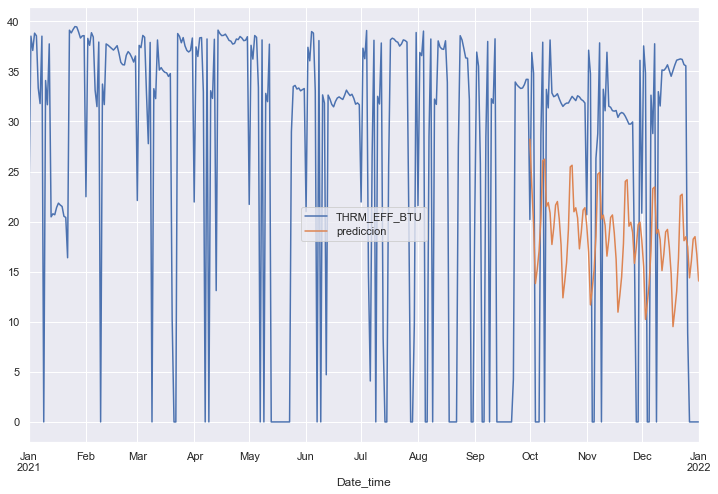

In [39]:
engine_dia_copia['prediccion']=results.predict(start="2021-10-01",end="2022-01-01",dynamic=True)
engine_dia_copia[['THRM_EFF_BTU','prediccion']].plot(figsize=(12,8))

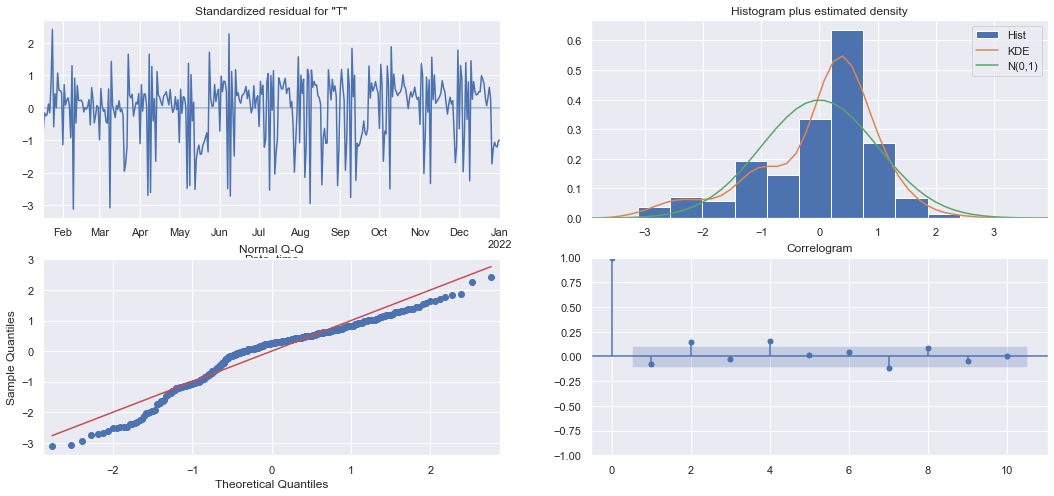

In [40]:
results.plot_diagnostics()
plt.show()

# Prediccion

In [41]:
engine_dia.shape[0] * 0.80

292.8

In [42]:
engine_dia.reset_index().iloc[292, 0]

Timestamp('2021-10-20 00:00:00')

In [43]:
start = engine_dia.reset_index().iloc[292, 0]
end = engine_dia.reset_index().iloc[-1, 0]
start, end

(Timestamp('2021-10-20 00:00:00'), Timestamp('2022-01-01 00:00:00'))

In [52]:
pred = results.predict(start=start, end=end)
pred_ci = results.get_prediction(start=start, end=end).conf_int()

df_pred = pd.DataFrame(pred, index=engine_dia.iloc[292:].index, columns=['THRM_EFF_BTU'])

In [53]:
df_pred.head()

,THRM_EFF_BTU
Date_time,
2021-10-20,NaN
2021-10-21,NaN
2021-10-22,NaN
2021-10-23,NaN
2021-10-24,NaN


In [54]:
pred_ci.head()

,lower THRM_EFF_BTU,upper THRM_EFF_BTU
Date_time,,
2021-10-20,-1.643674,47.855466
2021-10-21,-0.312077,49.185071
2021-10-22,3.236670,52.731954
2021-10-23,7.771879,57.265505
2021-10-24,3.972323,53.464656


In [57]:
df_prediction = pd.concat([df_pred, pred_ci], axis=1)
df_prediction.head()

,THRM_EFF_BTU,lower THRM_EFF_BTU,upper THRM_EFF_BTU
Date_time,,,
2021-10-20,NaN,-1.643674,47.855466
2021-10-21,NaN,-0.312077,49.185071
2021-10-22,NaN,3.236670,52.731954
2021-10-23,NaN,7.771879,57.265505
2021-10-24,NaN,3.972323,53.464656


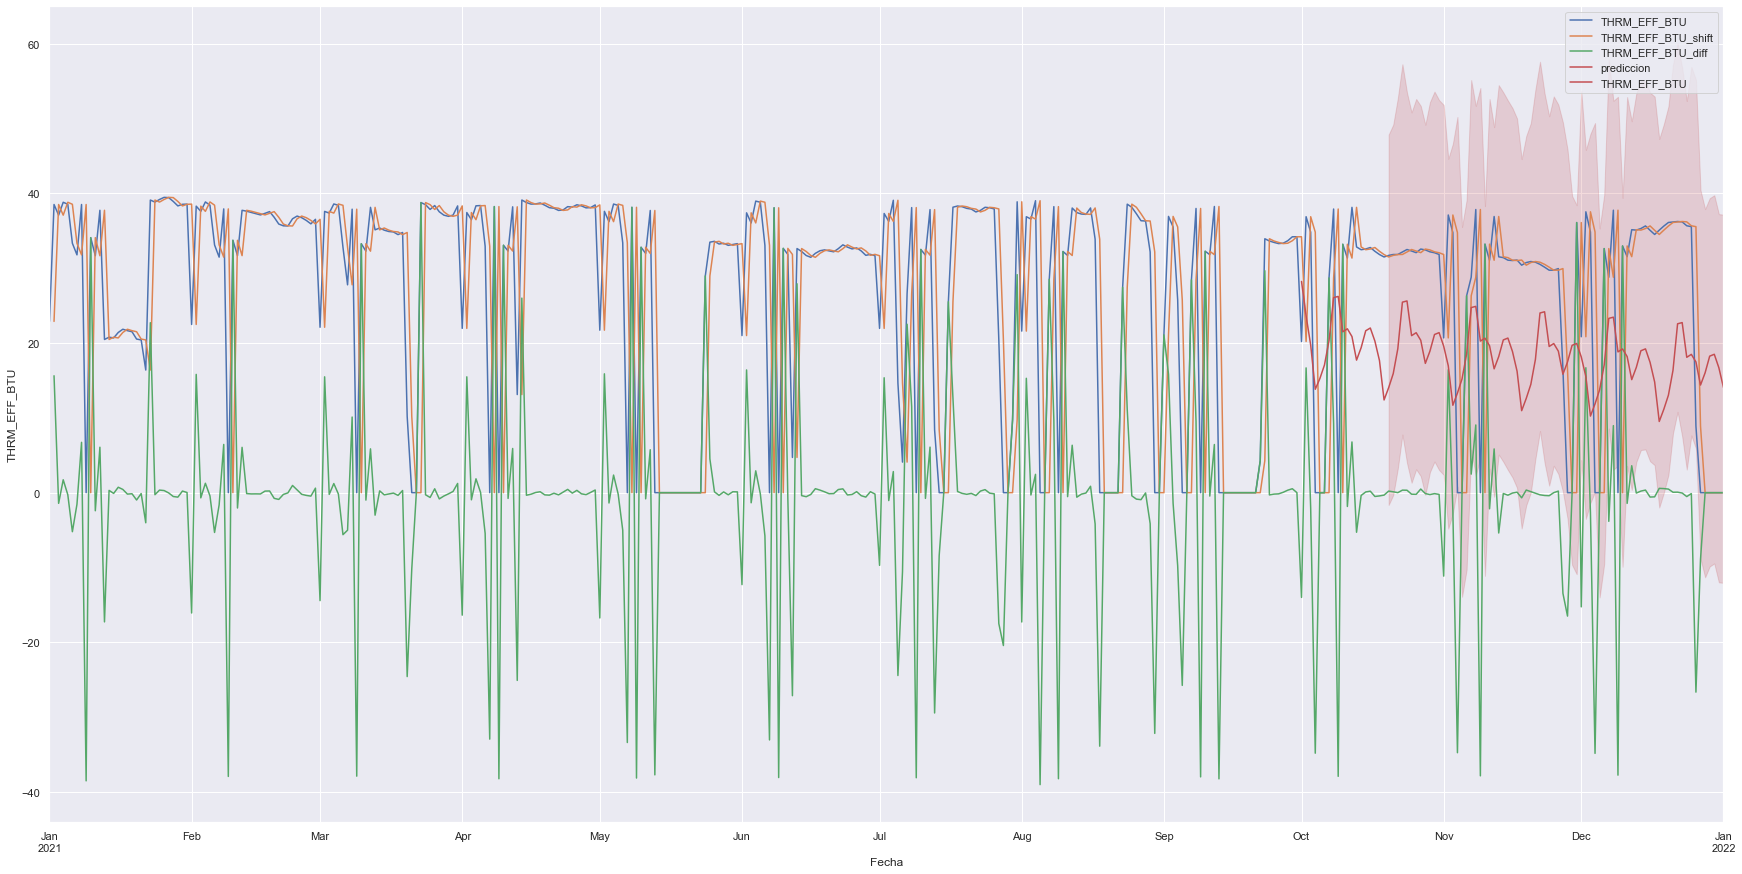

In [58]:
rcParams['figure.figsize'] = 30, 15
ax = engine_dia.plot(label='observed')
df_prediction['THRM_EFF_BTU'].plot(c='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('THRM_EFF_BTU')
plt.legend()

plt.show()

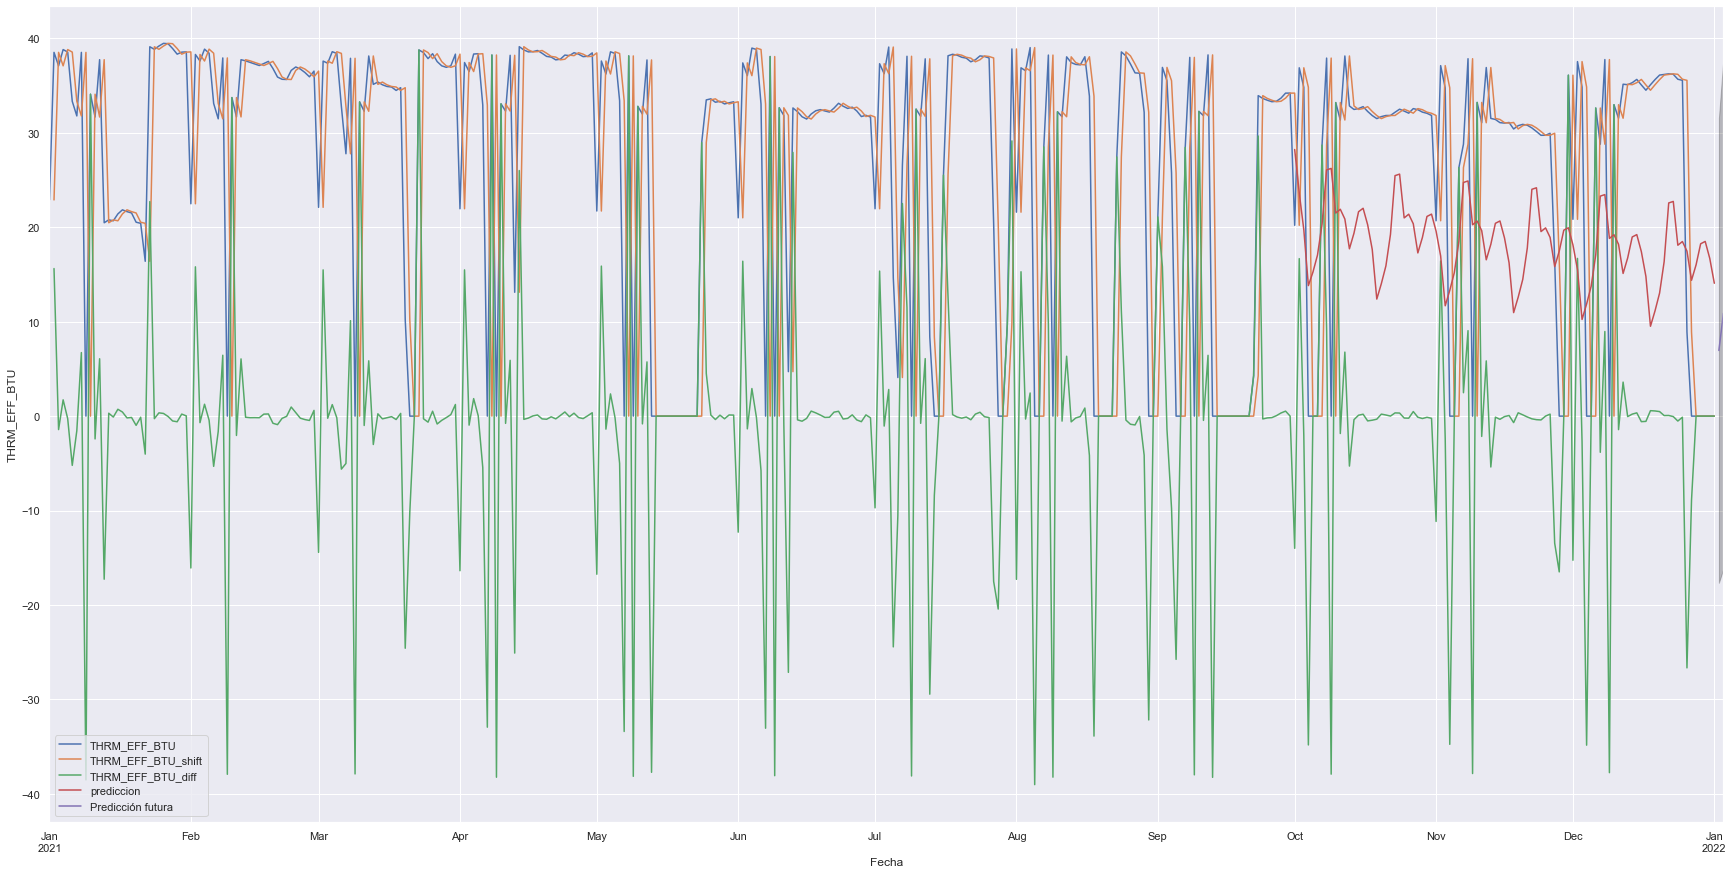

In [59]:
rcParams['figure.figsize'] = 30, 15

pred_uc = results.get_forecast(steps=2)
pred_ci = pred_uc.conf_int()
ax = engine_dia.plot(label='Observado', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Predicción futura')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('THRM_EFF_BTU')
plt.legend()
plt.show()